In [45]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import math
import matplotlib.pyplot as plt

In [46]:
ess = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/ess_combined_2012_2014.csv')

In [85]:
ess.info()
ess.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8147 entries, 0 to 8146
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   cntry    8147 non-null   object
 1   idno     8147 non-null   int64 
 2   year     8147 non-null   int64 
 3   tvtot    8147 non-null   int64 
 4   ppltrst  8147 non-null   int64 
 5   pplfair  8147 non-null   int64 
 6   pplhlp   8147 non-null   int64 
 7   happy    8147 non-null   int64 
 8   sclmeet  8147 non-null   int64 
 9   sclact   8147 non-null   int64 
 10  gndr     8147 non-null   int64 
 11  agea     8147 non-null   int64 
 12  partner  8147 non-null   int64 
dtypes: int64(12), object(1)
memory usage: 827.6+ KB


,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5,6,3,3,10,5,8,5,4,2,60,1
1,CH,25,6,6,5,7,5,9,3,2,2,59,1
2,CH,26,6,1,8,8,8,7,6,3,1,24,2
3,CH,28,6,4,6,6,7,10,6,2,2,64,1
4,CH,29,6,5,6,7,5,8,7,2,2,55,1


In [48]:
# figure out what the unique values are for each year
ess.year.unique()

array([6, 7])

In [49]:
# Referencing the code book we are able to assign each of these values to a year
ess_2012 = df[ess.year == 6]
ess_2014 = df[ess.year == 7]

DescribeResult(nobs=4071, minmax=(0, 10), mean=5.578481945467944, variance=4.893040545067073, skewness=-0.5431086926347095, kurtosis=-0.1210956960964813) 

DescribeResult(nobs=4076, minmax=(0, 10), mean=5.5713935230618254, variance=4.927171652708959, skewness=-0.4601859476512641, kurtosis=-0.25006786100787215)


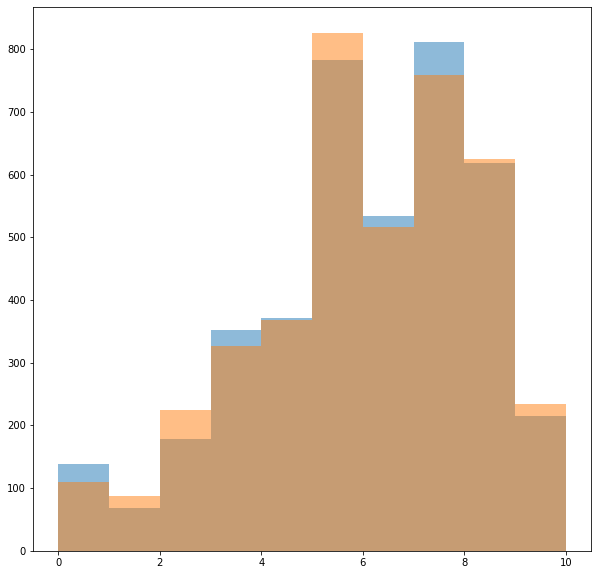

In [50]:
# Let's look at the data in order to determine how to proceed

print(stats.describe(ess_2012['ppltrst']), '\n')
print(stats.describe(ess_2014['ppltrst']))

plt.figure(figsize = (10, 10))
plt.hist(ess_2012.ppltrst, alpha = .5)
plt.hist(ess_2014.ppltrst, alpha = .5)
plt.show()

In [51]:
# This distribution is roughly normal. Because idno is not a unique identifier we can't assume that these
# samples are from the same population. We will treat them as independant populations

In [52]:
stats.ttest_ind(ess_2012['ppltrst'], ess_2014['ppltrst'])

Ttest_indResult(statistic=0.1443685081969842, pvalue=0.8852130548889106)

In [53]:
# Given this result we cannot reject the null hypothesis that there is no difference between the two populations.
# Indeed the pvalue suggests that these populations are very closely related. 

DescribeResult(nobs=4071, minmax=(0, 10), mean=7.731515598133137, variance=3.0819524689826823, skewness=-1.1505518232802756, kurtosis=1.9055890346061979) 

DescribeResult(nobs=4076, minmax=(0, 10), mean=7.6854759568204125, variance=2.840436853164115, skewness=-1.0296465664009635, kurtosis=1.5218046596567287)


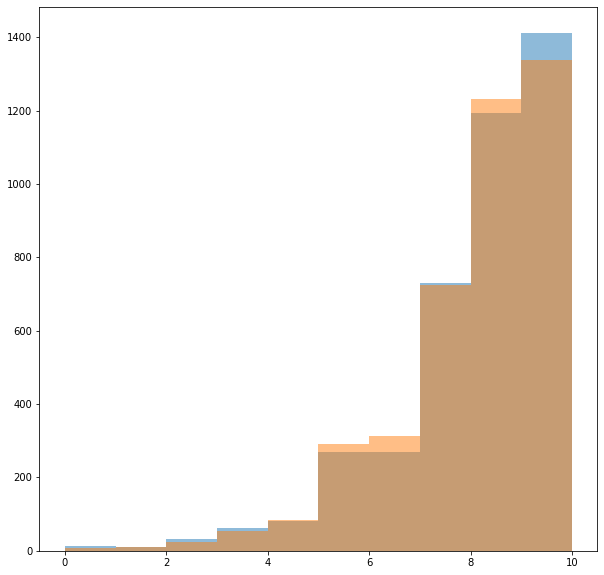

In [54]:
# Moving on to the next question let's examine the data

print(stats.describe(ess_2012['happy']), '\n')
print(stats.describe(ess_2014['happy']))

plt.figure(figsize = (10, 10))
plt.hist(ess_2012.happy, alpha = .5)
plt.hist(ess_2014.happy, alpha = .5)
plt.show()

In [55]:
# This distribution is not normal. Let's use a Kruskal-Wallis test.

stats.kruskal(ess_2012['happy'], ess_2014['happy'])

KruskalResult(statistic=3.725441202182227, pvalue=0.05358946830655459)

In [56]:
# This result is close to the critical values but still falls short of a pvalue < .05. Additionally a visual
# examination of the distributions shows that there is not enough evidence to reject our null hypothesis.

In [87]:
ess_2014.cntry.unique()

array(['CH', 'CZ', 'DE', 'ES', 'NO', 'SE'], dtype=object)

In [88]:
ch = ess_2014[ess_2014.cntry == 'CH']
de = ess_2014[ess_2014.cntry == 'DE']
no = ess_2014[ess_2014.cntry == 'NO']
es = ess_2014[ess_2014.cntry == 'ES']

In [91]:
print(stats.describe(ch.sclmeet), '\n')
print(stats.describe(de.sclmeet), '\n')
print(stats.describe(no.sclmeet), '\n')
print(stats.describe(es.sclmeet))

DescribeResult(nobs=743, minmax=(1, 7), mean=5.174966352624495, variance=1.6944129031789972, skewness=-0.6382977240097087, kurtosis=-0.24036067403841654) 

DescribeResult(nobs=14, minmax=(3, 6), mean=4.428571428571429, variance=0.5714285714285714, skewness=0.24891663306000175, kurtosis=-0.20118343195266197) 

DescribeResult(nobs=712, minmax=(1, 7), mean=5.310393258426966, variance=1.8064741067336714, skewness=-0.6366633314784985, kurtosis=-0.33293306740001993) 

DescribeResult(nobs=1134, minmax=(1, 7), mean=5.263668430335097, variance=2.067222541332574, skewness=-0.8331602682762435, kurtosis=0.2132945592754396)


In [95]:
# Let's run a Tukey's HSD test
from statsmodels.stats.multicomp import pairwise_tukeyhsd

SyntaxError: can't assign to operator (<ipython-input-95-a4dd4f35e91f>, line 4)

In [100]:
# For this test we need those countries datas in the same DataFrame
ess_ch_de_no_es = ess_2014[ess_2014['cntry'].isin(['CH', 'DE', 'NO', 'ES'])]

tukey = pairwise_tukeyhsd(endog = ess_ch_de_no_es['sclmeet'],      # Data
                          groups = ess_ch_de_no_es['cntry'],   # Groups
                         alpha=0.05)         # Significance level

tukey.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
CH,DE,-0.7464,0.1819,-1.6978,0.205,False
CH,ES,0.0887,0.5163,-0.0777,0.2552,False
CH,NO,0.1354,0.236,-0.0495,0.3204,False
DE,ES,0.8351,0.1069,-0.1132,1.7834,False
DE,NO,0.8818,0.081,-0.0699,1.8336,False
ES,NO,0.0467,0.8853,-0.1219,0.2154,False


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0226f69f10>,
      dtype=object)

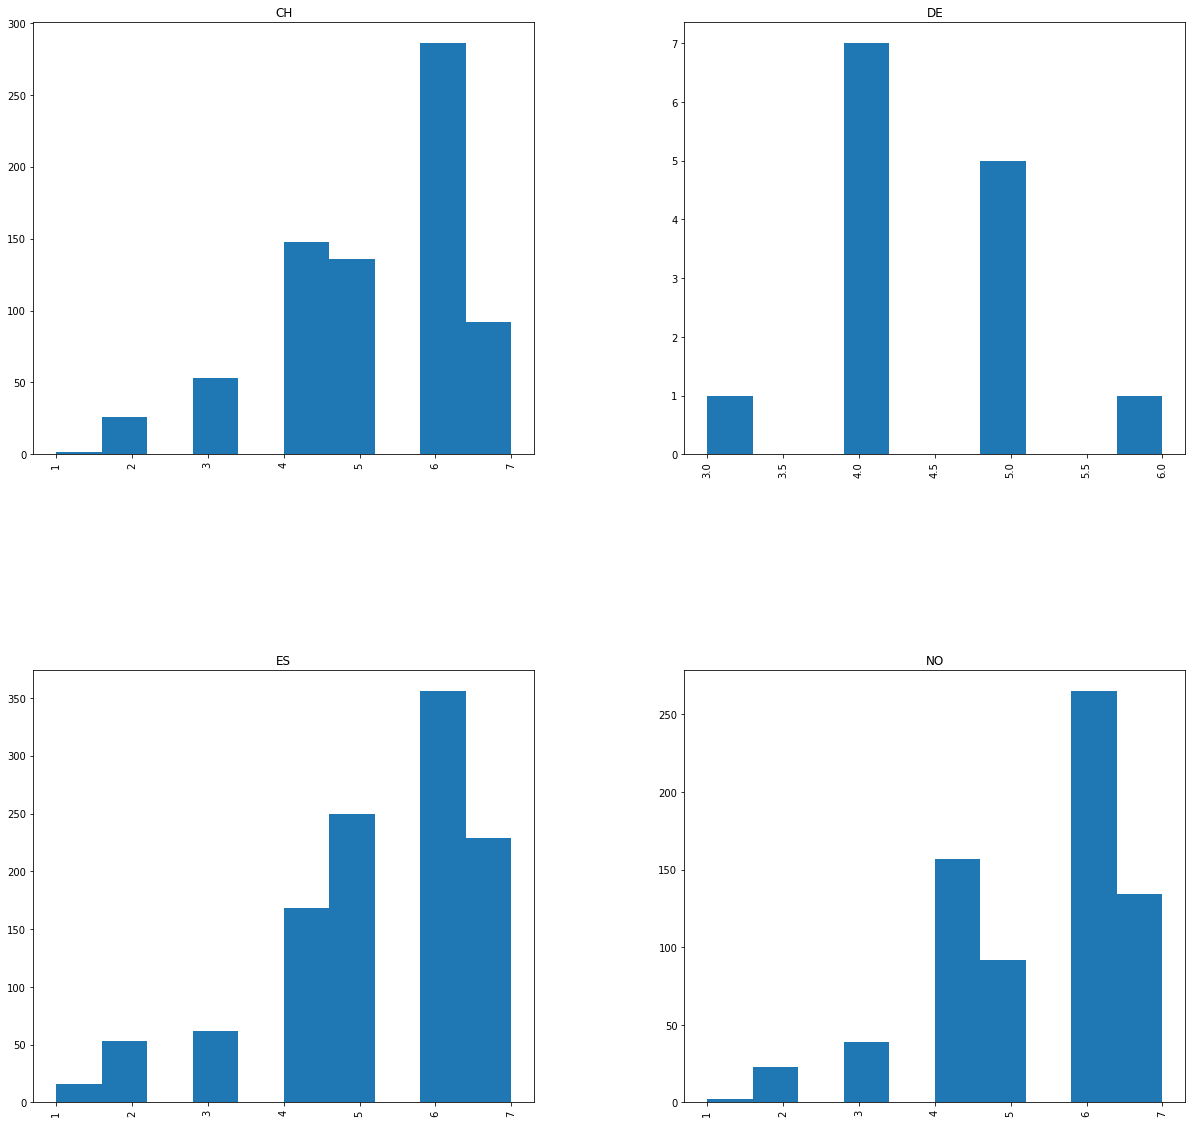

In [106]:
# None of these stand out according to our Tukey test. Let's look at their distribution visually.
ess_ch_de_no_es['sclmeet'].hist(by = ess_ch_de_no_es['cntry'], figsize = (20,20))

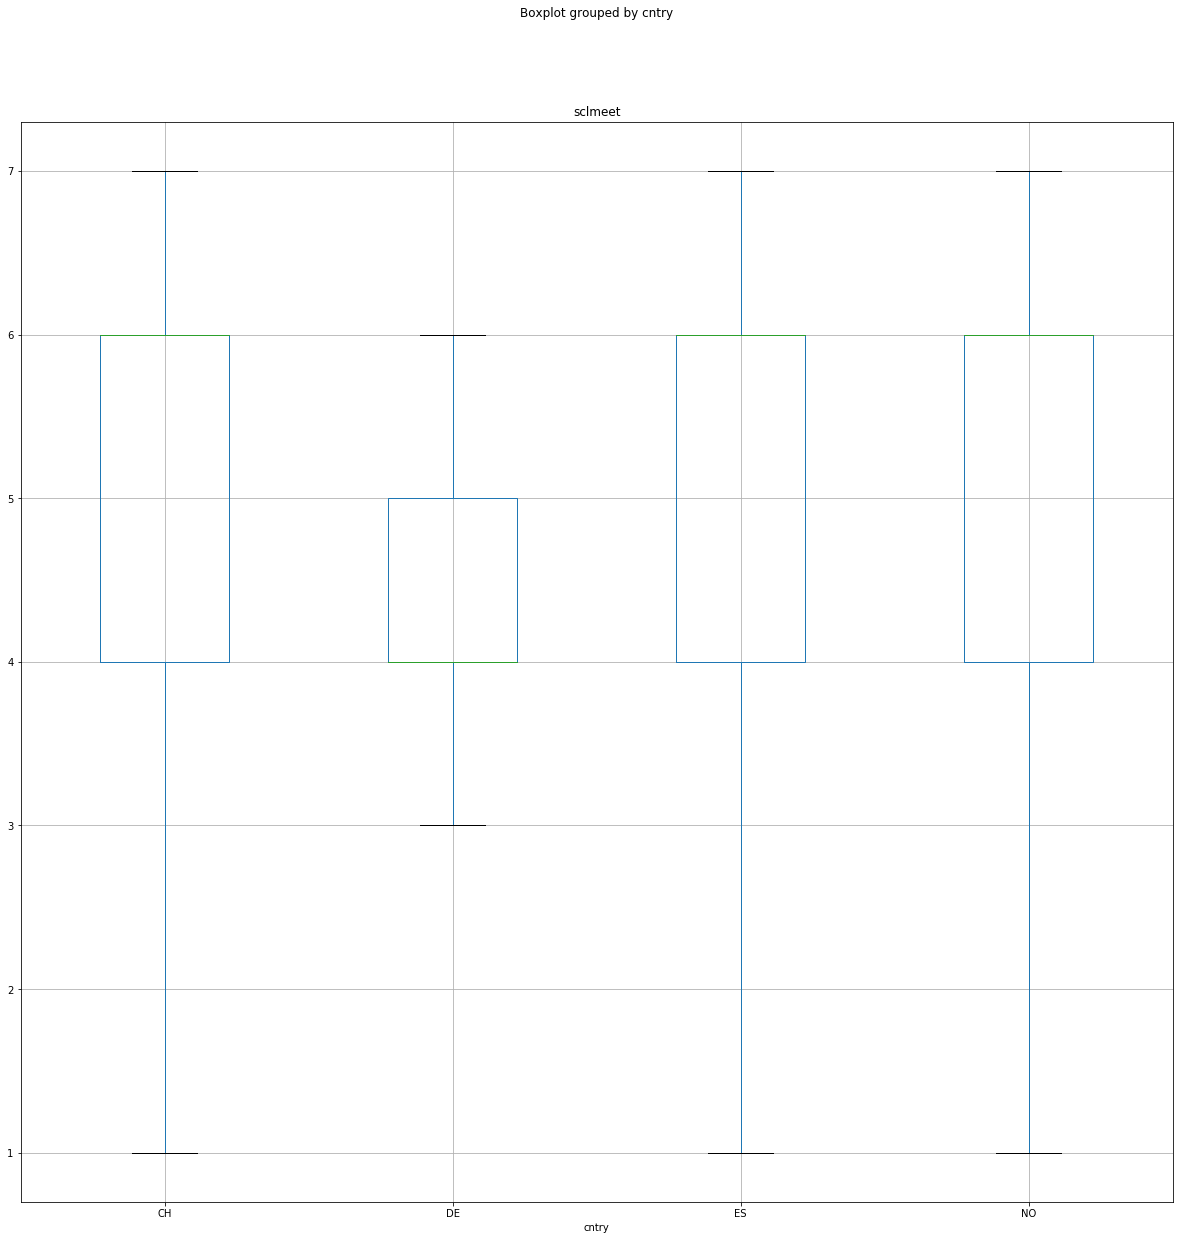

In [105]:
ess_ch_de_no_es.boxplot('sclmeet', by='cntry', figsize = (20,20))

In [107]:
# Perhaps Tukey was not the right mode of assesment to use because it rejected our null hypothesis but this box
# plot shows that Denmark appears to be quite different from the others. What about a One-way ANOVA test?

stats.f_oneway(ch['sclmeet'], de['sclmeet'], es['sclmeet'], no['sclmeet'])ess_ch_de_no_es.boxplot('sclmeet', by='cntry', figsize = (20,20))

F_onewayResult(statistic=2.9063306605207404, pvalue=0.03346515188750171)

In [ ]:
# This test suggests that there is a significant variation between the means of each sample. Based upon our
# analysis of the boxplot, people in Denmark engage in social meetings less than the rest of the group.

In [108]:
# Now lets compare each populations engagement in social activities.

print(stats.describe(ch.sclact), '\n')
print(stats.describe(de.sclact), '\n')
print(stats.describe(no.sclact), '\n')
print(stats.describe(es.sclact))

DescribeResult(nobs=743, minmax=(1, 5), mean=2.784656796769852, variance=0.821489336230696, skewness=0.056518838123621226, kurtosis=-0.05699247701187771) 

DescribeResult(nobs=14, minmax=(1, 4), mean=2.7142857142857144, variance=0.5274725274725275, skewness=-0.7909810627737351, kurtosis=0.6354166666666665) 

DescribeResult(nobs=712, minmax=(1, 5), mean=2.860955056179775, variance=0.6740289037437381, skewness=0.09364724158452321, kurtosis=0.39039548364910237) 

DescribeResult(nobs=1134, minmax=(1, 5), mean=2.631393298059965, variance=0.9037267419144442, skewness=0.05248738196690647, kurtosis=-0.25954410283656104)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f02266d9c10>,
      dtype=object)

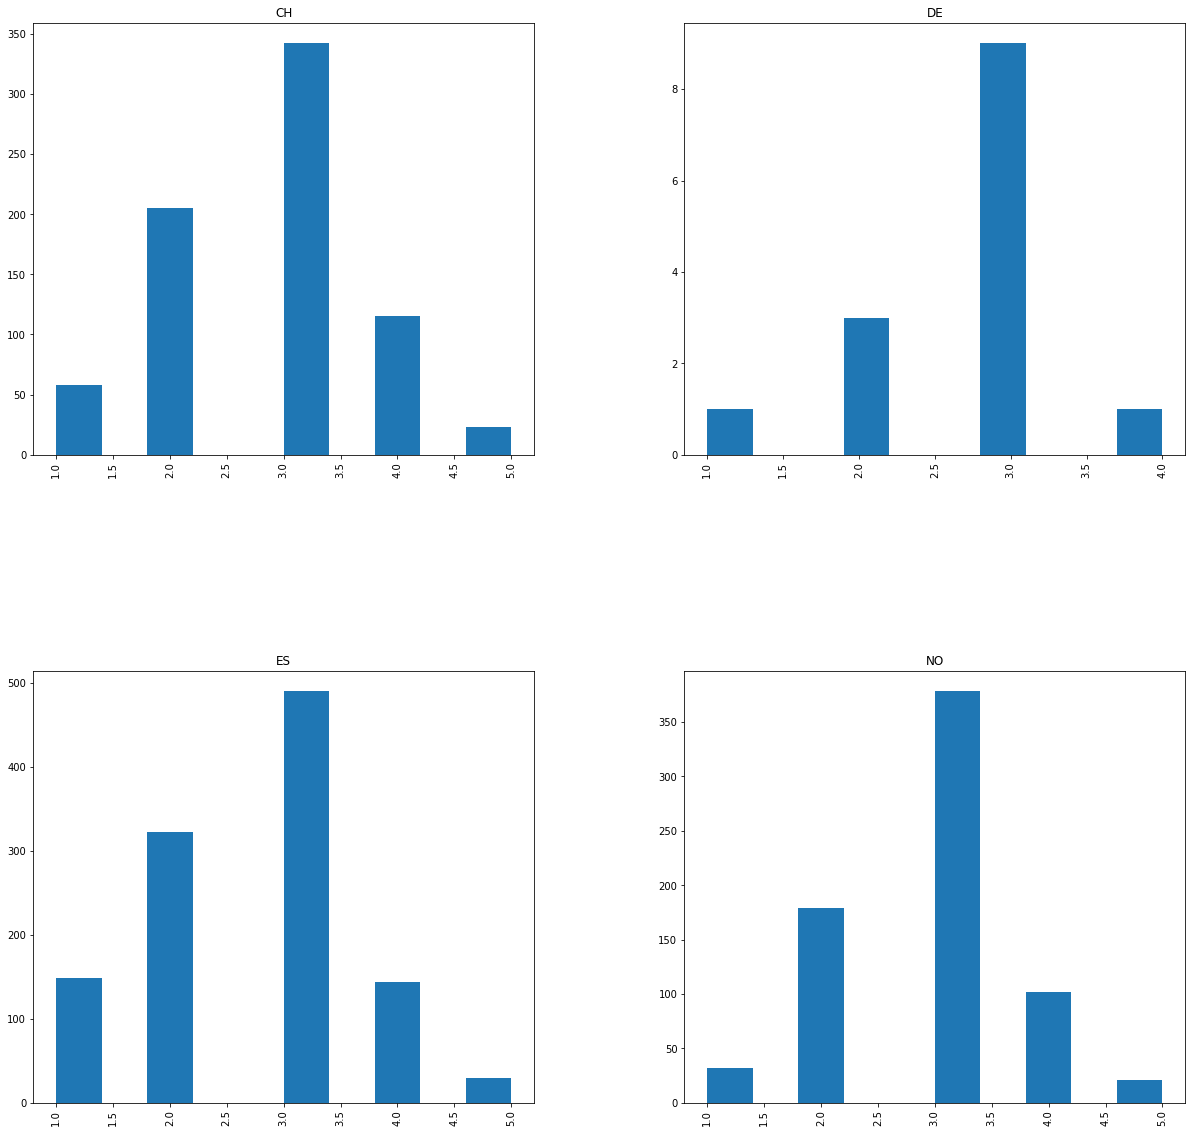

In [109]:
# These samples are all normally distributed enough
# Let's do the visual analysis first
ess_ch_de_no_es['sclact'].hist(by = ess_ch_de_no_es['cntry'], figsize = (20,20))

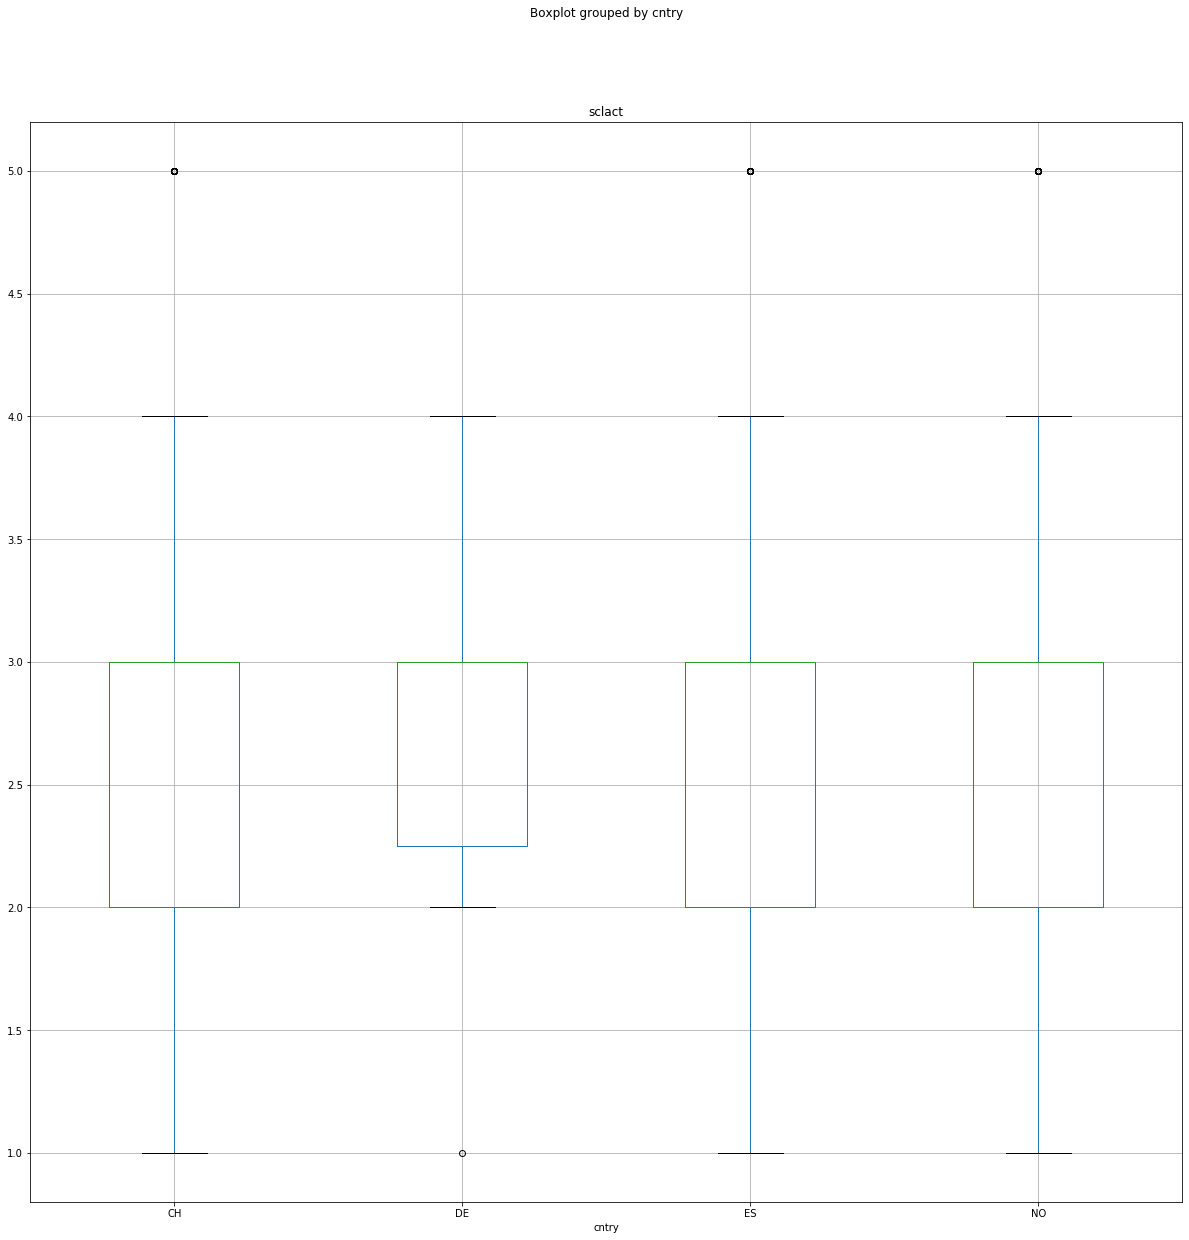

In [110]:
ess_ch_de_no_es.boxplot('sclact', by='cntry', figsize = (20,20))

In [111]:
# Visually the differences appear to be less pronounced than in the last case. Let's see what the tests say:

tukey_2 = pairwise_tukeyhsd(endog = ess_ch_de_no_es['sclact'],      # Data
                          groups = ess_ch_de_no_es['cntry'],   # Groups
                         alpha=0.05)         # Significance level

tukey_2.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
CH,DE,-0.0704,0.9,-0.6966,0.5559,False
CH,ES,-0.1533,0.0019,-0.2628,-0.0437,True
CH,NO,0.0763,0.3734,-0.0455,0.198,False
DE,ES,-0.0829,0.9,-0.7072,0.5414,False
DE,NO,0.1467,0.9,-0.4798,0.7732,False
ES,NO,0.2296,0.001,0.1186,0.3406,True


In [112]:
stats.f_oneway(ch['sclact'], de['sclact'], es['sclact'], no['sclact'])

F_onewayResult(statistic=10.331448366565597, pvalue=9.289463479124866e-07)

In [114]:
# Based upon the Tukey test Spain is the outlier here. Our ANOVA test tells us that there is a statistically
# significant deviation between the means of the sample populations. Let's check Denmark and Spain against the
# others
print('Comparisons vs Denmark', '\n')
print(stats.ttest_ind(de['sclact'], ch['sclact']), '\n')
print(stats.ttest_ind(de['sclact'], es['sclact']), '\n')
print(stats.ttest_ind(de['sclact'], no['sclact']), '\n')

print('Comparisons vs Spain')
print(stats.ttest_ind(es['sclact'], ch['sclact']), '\n')
print(stats.ttest_ind(es['sclact'], de['sclact']), '\n')
print(stats.ttest_ind(es['sclact'], no['sclact']))

Comparisons vs Denmark 

Ttest_indResult(statistic=-0.28869953984944624, pvalue=0.7728905598034453) 

Ttest_indResult(statistic=0.32503027389966244, pvalue=0.7452174850209412) 

Ttest_indResult(statistic=-0.6632621751899663, pvalue=0.5073737764824289) 

Comparisons vs Spain
Ttest_indResult(statistic=-3.478987931157087, pvalue=0.0005148090072335817) 

Ttest_indResult(statistic=-0.32503027389966244, pvalue=0.7452174850209412) 

Ttest_indResult(statistic=-5.31751240602575, pvalue=1.1799291265139793e-07)


In [ ]:
# We have insufficent evidence to reject the null hypothesis in the case of Denmark, despite our visual assesment
# Spain on the other hand is significantly different according to these tests. However given the conflicting 
# results we have seen further study is needed before we can reject our null hypothesis.

In [ ]:
# Ruff Figural Fluency Test

In [57]:
fluency = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/rfft.csv')

In [58]:
# Examine the data to get started
fluency.info()
fluency.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7545 entries, 0 to 7544
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Casenr         7545 non-null   int64  
 1   Age            7545 non-null   int64  
 2   Gender         7545 non-null   object 
 3   Education      7545 non-null   object 
 4   Measurement    7545 non-null   object 
 5   Unique         7545 non-null   float64
 6   Perseverative  7545 non-null   float64
 7   Interval       7545 non-null   object 
dtypes: float64(2), int64(2), object(4)
memory usage: 471.7+ KB


,Casenr,Age,Gender,Education,Measurement,Unique,Perseverative,Interval
0,1,74,Male,Lower secondary school (ISCED 2),Measurement 1 (2003-2006),32.0,1.0,Not applicable
1,1,74,Male,Lower secondary school (ISCED 2),Measurement 2 (2006-2008),35.0,0.0,2.842122556
2,1,74,Male,Lower secondary school (ISCED 2),Measurement 3 (2008-2012),50.5,14.5,2.201232033
3,2,48,Male,Higher secondary school (ISCED 3-4),Measurement 1 (2003-2006),26.0,3.0,Not applicable
4,2,48,Male,Higher secondary school (ISCED 3-4),Measurement 2 (2006-2008),47.0,3.0,2.762718362


In [71]:
# We need to rearange the data so that each case is represented by a row rather than mulitple rows
fluency_pivot = fluency.pivot(index='Casenr', columns='Measurement', values=['Unique', 'Perseverative']).reset_index()

In [72]:
fluency_pivot.head()

Casenr                    Unique                            \
Measurement        Measurement 1 (2003-2006) Measurement 2 (2006-2008)   
0                1                      32.0                      35.0   
1                2                      26.0                      47.0   
2                3                      91.0                      83.5   
3                4                      59.0                      54.0   
4                5                      60.0                      68.0   

                                                  Perseverative  \
Measurement Measurement 3 (2008-2012) Measurement 1 (2003-2006)   
0                                50.5                       1.0   
1                                71.0                       3.0   
2                                77.0                      11.0   
3                                64.0                      49.0   
4                                21.0                      14.0   

                                                                 
Measurement Measurement 2 (2006-2008) Measurement 3 (2008-2012)  
0                                 0.0                      14.5  
1                                 3.0                       0.5  
2                                21.0                      17.0  
3                                39.0                      11.0  
4                                16.0                       0.0

In [75]:
# Check how the columns are named now that the table has a more complex index
fluency_pivot.columns

MultiIndex([(       'Casenr',                          ''),
            (       'Unique', 'Measurement 1 (2003-2006)'),
            (       'Unique', 'Measurement 2 (2006-2008)'),
            (       'Unique', 'Measurement 3 (2008-2012)'),
            ('Perseverative', 'Measurement 1 (2003-2006)'),
            ('Perseverative', 'Measurement 2 (2006-2008)'),
            ('Perseverative', 'Measurement 3 (2008-2012)')],
           names=[None, 'Measurement'])

DescribeResult(nobs=2515, minmax=(13.0, 155.0), mean=78.69244532803181, variance=707.0341513370058, skewness=0.1471876477093264, kurtosis=-0.5467621966747225) 

DescribeResult(nobs=2515, minmax=(13.5, 161.5), mean=82.7079522862823, variance=808.8049884464099, skewness=0.020360395669875728, kurtosis=-0.5479245402887649)


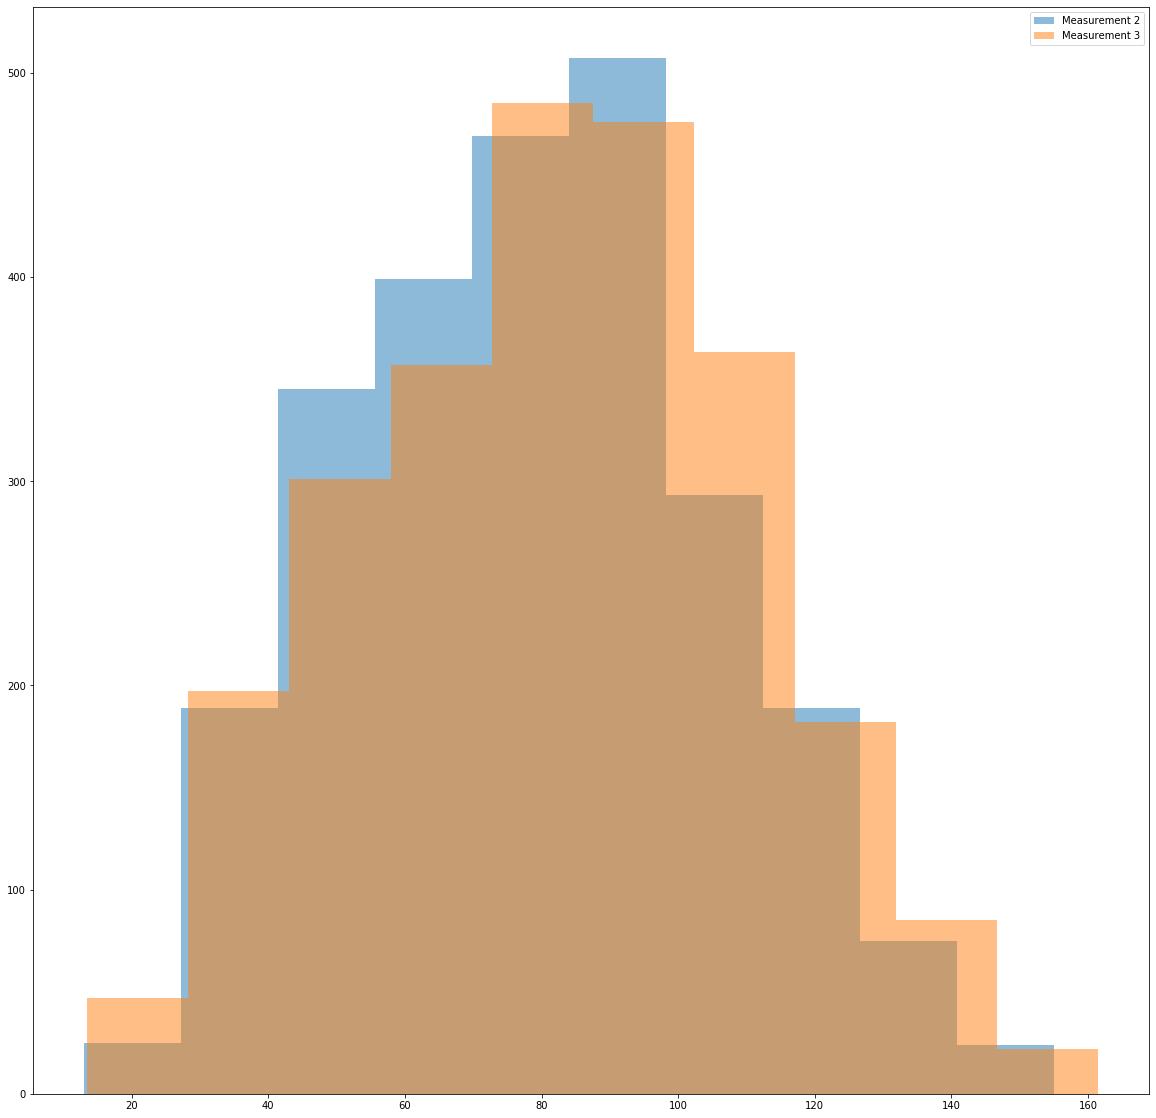

In [80]:
# Now let's take a look at these distributions.

print(stats.describe(fluency_pivot[('Unique', 'Measurement 2 (2006-2008)')]), '\n')
print(stats.describe(fluency_pivot[('Unique', 'Measurement 3 (2008-2012)')]))

plt.figure(figsize=(20,20))
plt.hist(fluency_pivot[('Unique', 'Measurement 2 (2006-2008)')], alpha = .5)
plt.hist(fluency_pivot[('Unique', 'Measurement 3 (2008-2012)')], alpha = .5)
plt.legend(['Measurement 2', 'Measurement 3'])
plt.show()

In [81]:
# These are normally distributed so lets go ahead and use a t-test for dependant groups.

stats.ttest_rel(fluency_pivot[('Unique', 'Measurement 2 (2006-2008)')], fluency_pivot[('Unique', 'Measurement 3 (2008-2012)')])

Ttest_relResult(statistic=-10.88544039426271, pvalue=5.3585747477799544e-27)

In [69]:
# Given these results we can reject the null hypothesis and say that there is a statistically significant
# difference between the number of unique designs created by particiapants in Measurements 2 and 3.

DescribeResult(nobs=2515, minmax=(0.0, 133.5), mean=11.769980119284295, variance=203.46626233055127, skewness=3.2001427277175862, kurtosis=13.913985994081123) 

DescribeResult(nobs=2515, minmax=(0.0, 124.0), mean=12.100198807157058, variance=187.75009940357853, skewness=3.03381078165085, kurtosis=13.347862924837408)


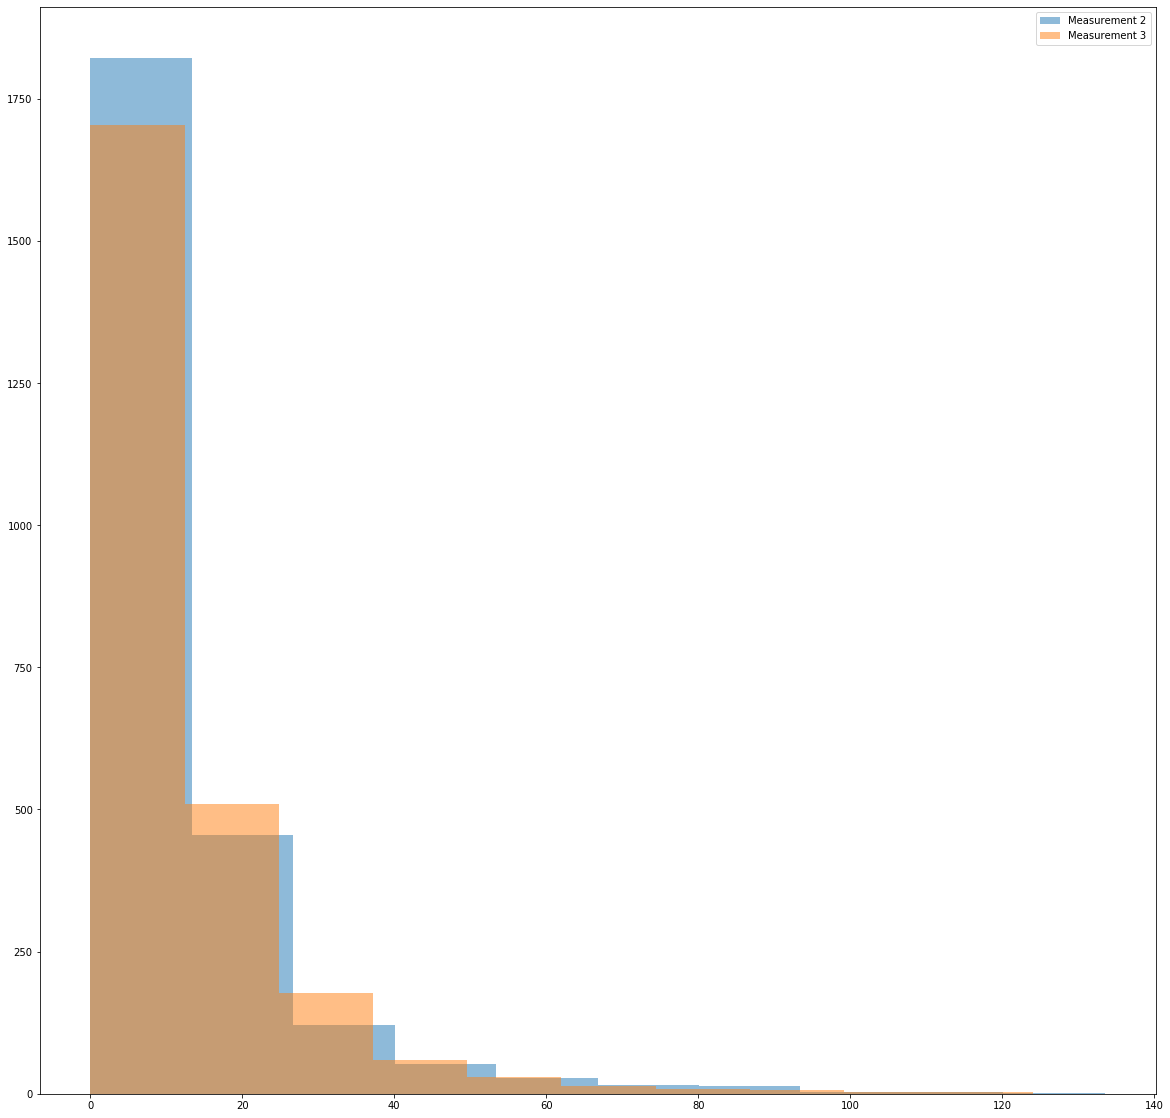

In [82]:
# Let's look at the data again

print(stats.describe(fluency_pivot[('Perseverative', 'Measurement 2 (2006-2008)')]), '\n')
print(stats.describe(fluency_pivot[('Perseverative', 'Measurement 3 (2008-2012)')]))

plt.figure(figsize=(20,20))
plt.hist(fluency_pivot[('Perseverative', 'Measurement 2 (2006-2008)')], alpha = .5)
plt.hist(fluency_pivot[('Perseverative', 'Measurement 3 (2008-2012)')], alpha = .5)
plt.legend(['Measurement 2', 'Measurement 3'])
plt.show()

In [83]:
# This distribution is not normal so we will need to use the Wilcoxon signed-rank test.

stats.wilcoxon(fluency_pivot[('Perseverative', 'Measurement 2 (2006-2008)')]
               - fluency_pivot[('Perseverative', 'Measurement 3 (2008-2012)')])

WilcoxonResult(statistic=1358373.0, pvalue=0.0006927535563546565)

In [ ]:
# Based upon our results we can reject our null hypothesis. Here we see a significant difference between the
# two samples.